11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 67s 63ms/step - accuracy: 0.8618 - loss: 0.4438 - val_accuracy: 0.9820 - val_loss: 0.0578
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 57ms/step - accuracy: 0.9812 - loss: 0.0589 - val_accuracy: 0.9865 - val_loss: 0.0414
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9875 - loss: 0.0404 - val_accuracy: 0.9874 - val_loss: 0.0393
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 59ms/step - accuracy: 0.9902 - loss: 0.0314 - val_accuracy: 0.9892 - val_loss: 0.0309
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 57ms/step - accuracy: 0.9920 - loss: 0.0235 - val_accuracy: 0.9900 - val_loss: 0.0328
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9858 - loss: 0.0461
Test accuracy: 0.9900


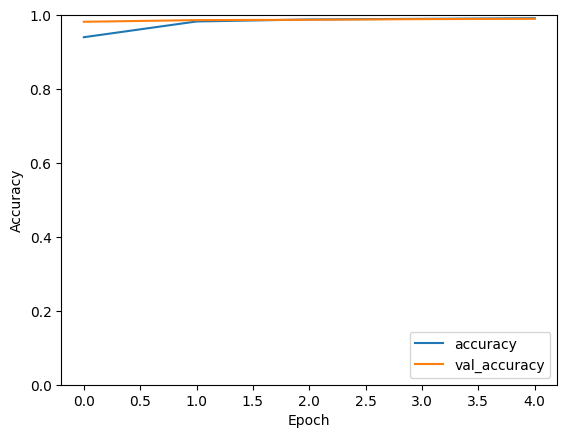

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# preprocessing
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)) / 255.0  # normalization
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)) / 255.0

# transformation into cathegories
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # convolutional layer
    layers.MaxPooling2D((2, 2)),  # pooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),  # Converting to a flat layer for Dense
    layers.Dense(64, activation='relu'),  # Fully connected layer
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes (numbers from 0 to 9)
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Categorical cross-entropy, because we have a multi-class problem
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

# visualization
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


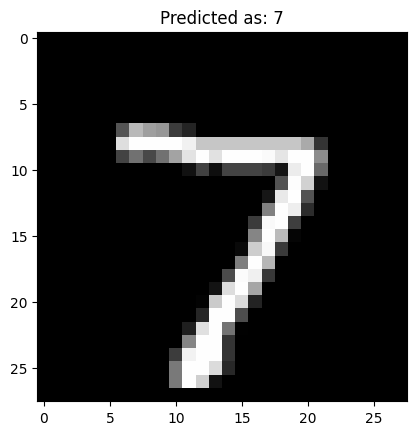

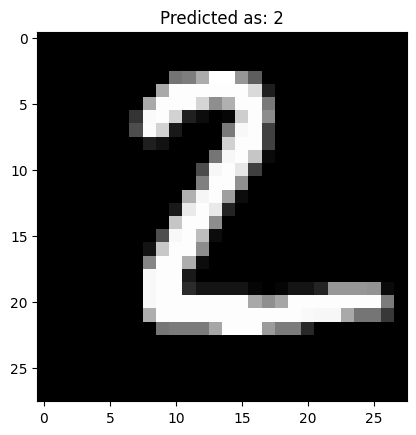

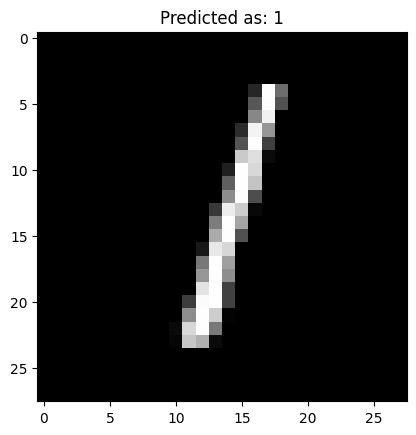

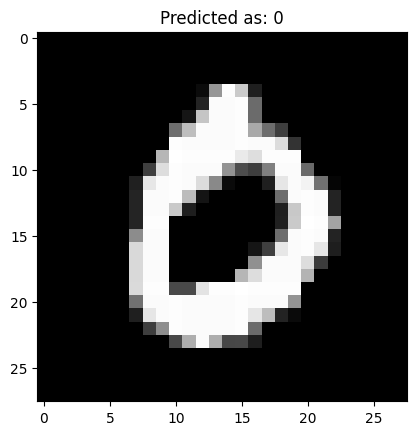

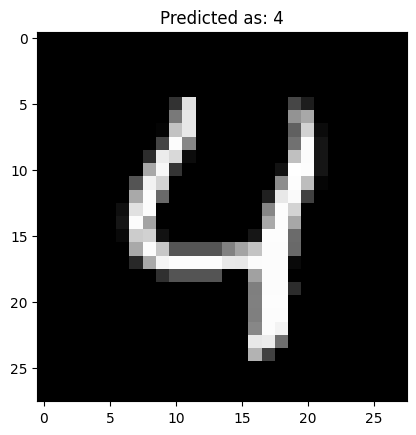

In [6]:
# Prediction for some examples
preds = model.predict(test_images[:5])

# and visualization
for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    predicted_class = np.argmax(preds[i])
    plt.title(f"Predicted as: {predicted_class}")
    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


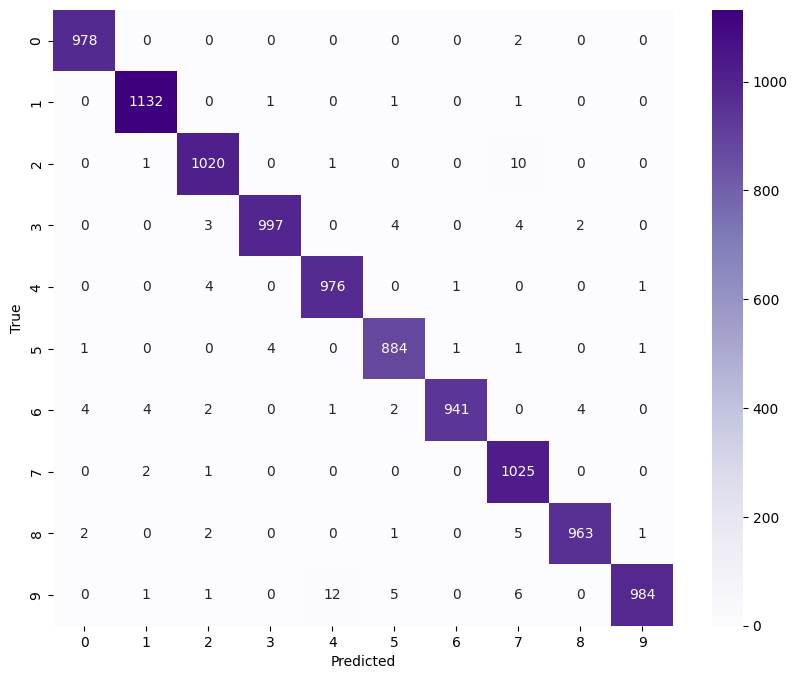

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# making predictions
predictions = np.argmax(model.predict(test_images), axis=1)
true_labels = np.argmax(test_labels, axis=1)

# making an error matrix (confusion matrix)
cm = confusion_matrix(true_labels, predictions)

# plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")  # Используем палитру "Purples" для сиреневого цвета
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

